# Examen 2: POO
fecha: 30/11/2023
* El examen se aprueba con 60 puntos. Tienen hasta 11.15 am. 
* Entregar un solo archivo Jupyter con nombre y apellido.
* Todas las consignas deben tener justificación con texto y explicación conceptual. No del código sino de la razón de la operación.

Datasets:
* conversion_para_entrenar.csv
* ingreso_para_entrenar.csv
* conversion_para_predecir.csv
* costo_publicidad.csv
* conversion_real.csv

## Supermercado La gondola. Año 2092
 
El supermercado la gondola es un líder en el sector minorista, atendiendo a clientes en el planeta tierra y con una sucursal en marte. Cuenta con una diversa gama de productos que incluye alimentación, tecnología, moda, entre otros. El supermercado posee toda su operacion de manera Holografica, por lo tanto es crucial predecir la conversión de los clientes dado su comportamiento. La idea será efectuar una campaña de marketing en aquello clientes que un algoritmo clasifique como compradores. Ahora bien dado que el costo de las publicidades holograficas es elevado, la empresa quiere solo publicitar en los clientes de alto valor. Para esto es importante generar una regresion que permita predecir el ingreso del cliente. 
 
Tu tarea como cientifico de datos es crear los dos algoritmos y luego calcular el rango de ganancia esperada de la propuesta, justificando tus servicios en el ROI del supermercado. 

	


# Clasificacion  (30 pts)
**total de la consigna (30 pts) Separado en preprocesamiento 20pts y modelo 10pts**

1. Decidir que hacer con el valor de  la ubicación "Marte". Si la decisión es no quedarse con Marte filtrar el dataset y continuar sin esa categoria, si la decision es quedarse con Marte, avanzar. La única razón que aceptará el directorio es demostrarlo vía datos de comportamiento del cliente respecto a **variables de navegación**. 
* Justificar graficamente 
* Realizar un t-test
*Hint: Hay algo parecido a las semanas de embarazos del examen anterior* (10 pts)  

2. Hay dos columnas con valores atipicos.  (10 pts)
* Graficar y encontrar valores outliers
* ¿Cuantos valores outliers hay por cada columna? Para responder esto tendra que crear una columna por variable que determine si esa row es outlier o no. A esto se le llama columna flag. Utilice la funcion find_and_filter_outliers y modifiquela para obtener lo requerido. *Hint: f-string*
* Solo una de las dos columnas debe filtrarse y la otra no. Tenga en cuenta que vamos a usar un modelo de decisión tree que es robusto a outliers. Justificar cual y aplique la función original find_and_filter_outliers y filtrar los puntos atipicos en el nuevo dataset

```python

def find_and_filter_outliers(dataframe, column_name):
    # Calcular el rango intercuartílico
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # marcar las rows como outliers
    dataframe['is_outlier'] = dataframe[column_name].apply(lambda x: 'Yes' if (x < lower_bound or x > upper_bound) else 'No')
   

    # Retornar un dataset filtrado
    return dataframe[dataframe['is_outlier'] == 'No']
```
3. Seleccionar solo las variables pertinentes para un modelo de clasificación de conversión. Ejemplo: No necesitamos el id de la persona. Crear una hipotesis en palabras. Cree las variables dummies si cree correspondiente (5 pts)
```python
df_con_dummies = pd.get_dummies(df, columns=["cols_for_one_hot"])
```

### Modelo (10pts)
4. Separar train y test. Fitear un arbol de profundidad 3. 

```python
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
```
5. Crear y_pred
6. Generar  la matriz de confusion y las metricas, precision, recall y acuracy. Respecto a y_test
```python
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
```
5. Explicar la metrica precision_score en palabras. Que significa en este contexto?

6. Visualizar el arbol. ¿Que regla o reglas harías a la hora de hacer una publicidad? (hint te lo dice el grafico) 
Codigo que funciona bastante bien en todas las computadoras. 
```python
#!pip install scikit-learn graphviz matplotlib
from sklearn.tree import export_graphviz
import graphviz

# Exportar el árbol en formato DOT
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=['Clase1', 'Clase2'],  # Ajusta según tus clases
                           filled=True, rounded=True,  
                           special_characters=True)  

# Usar Graphviz para crear la visualización
graph = graphviz.Source(dot_data)  
graph.render("arbol_decision")  # Guarda el gráfico como un archivo .png
graph 
```

###  Regresión (20 pts)

Instrucciones y Puntaje:
1. Valores faltantes. (5 pts)

Este dataset **no tiene valores outliers** para que sea mas fácil la resolución del examen. 
Lo que si **tiene son valores nulos** en solo dos columnas. 

* Elegir cual columna con nulos se reemplaza con 0 y cual columna con la media por la media. Justifique.

2. Selección de Variables pertinentes  (5 pts)
Descarte la variable (o variables) que no considere importante para la predicciòn del ingreso del cliente. Justifique. 

3.Entrenamiento y Validación del Modelo de Regresión (10 pts)
* Divida el conjunto de datos en entrenamiento y test. 
* Entrene un algoritmo de regresion que prediga ingreso.


```python
import statsmodels.api as sm
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()
```
* Evalue el modelo utilizando la metrica MAPE




```python
import numpy as np
predicciones = modelo.predict(X)
# Calcular MAPE
mape = np.mean(np.abs((y - predicciones) / y)) * 100
print(f"MAPE: {mape}%")
```
* Interprete los coeficiente que significan (Explicar en palabras)
* Intereprete el error MAPE que significa? (Explicar en palabras)



##  Integración de Modelos y ROI en Publicidad 


## Explicación:

### Estimación del Valor Esperado del Cliente
Dado un modelo de clasificación que provee una probabilidad de que cada cliente haga una compra, 
y un modelo de regresión que estima el ingreso por cliente, el valor esperado del ingreso de un cliente se puede calcular como:

\begin{equation*}
ValorEsperado_{ingreso} = Probabilidad_{compra} \times Ingreso_{estimado}
\end{equation*}

Donde $Probabilidad_{compra}$ es la probabilidad de compra predicha por el modelo de clasificación y $Ingreso_{estimado}$ es el ingreso 
estimado del modelo de regresión.

### Cálculo del Costo de Publicidad total
El costo de publicidad total se pude estimar dado nuestro modelo de clasificación. Aunque sea en otro set de entrenamiento tenemos una estimación que podemos inferir para otra muestra. La formula es

\begin{equation*}
CostoPublicidad_{Total} = FP_{count} \times Costo_{publicidad}
\end{equation*}

Donde $FP_{count}$ es el número de falsos positivos y $Costo_{publicidad}$ es el costo de publicidad por cliente dado en el dataset costo.csv








#### Cálculo del ROI



\begin{equation*}
ROI = \frac{\left((TP \times ValorEsperado_{ingreso}) \right) - \left( CostoPublicidad_{Total} \right)}{CostoPublicidad_{Total}}
\end{equation*}




## Consignas ganancia del modelo (50pts):
a. Utilice para predecir los datasets correspondientes.
b. ¿Cual es el valor esperado del algoritmo? 
c. Dado el resultado del modelo en el punto 1 del examen (1. Clasificacion). De 1000 clientes ¿Cuantos espera que sea Falsos positivos? Con esa suposición calcule el costo de publicidad total. 
d. Paso un mes y sabemos quienes convirtieron. conversion_real.csv. Calcule el roi (hint: vaya calculando cada elemento de la ecuación)
e. Que cliente tiene mayor ROI? 
hint: 
```python
.nlargest(1, 'roi')
```
f. ¿Cual es el ROI real del modelo?


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
conv = pd.read_csv('conversion_para_entrenar.csv')

In [3]:
conv

,Unnamed: 0,id del cliente,páginas visitadas,duración de la sesión,número de visitas,fecha de nacimiento,ubicación,dispositivo,convertido
0,0,1,9,91.231418,39,1955-11-30 12:27:39.148023,Marte,tablet,Sí
1,1,2,5,740.421698,11,1998-11-19 12:27:39.148023,Marte,móvil,No
2,2,3,6,15.947268,3,1962-11-28 12:27:39.148023,Marte,tablet,Sí
3,3,4,5,950.486443,18,1967-11-27 12:27:39.148023,Marte,móvil,Sí
4,4,5,5,63.656943,26,1982-11-23 12:27:39.148023,Marte,ordenador,No
...,...,...,...,...,...,...,...,...,...
2995,2995,2996,6,213.400237,6,1962-11-28 12:27:39.148023,Ciudad B,ordenador,No
2996,2996,2997,3,359.351304,7,1962-11-28 12:27:39.148023,Ciudad B,ordenador,No
2997,2997,2998,9,352.961711,33,1980-11-23 12:27:39.148023,Ciudad A,ordenador,No
2998,2998,2999,7,230.507817,13,1982-11-23 12:27:39.148023,Ciudad A,ordenador,No


In [4]:
conv = conv.drop(columns = ['Unnamed: 0'])

In [5]:
conv.shape

(3000, 8)

In [6]:
conv.isna().sum()

id del cliente           0
páginas visitadas        0
duración de la sesión    0
número de visitas        0
fecha de nacimiento      0
ubicación                0
dispositivo              0
convertido               0
dtype: int64

In [7]:
conv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id del cliente         3000 non-null   int64  
 1   páginas visitadas      3000 non-null   int64  
 2   duración de la sesión  3000 non-null   float64
 3   número de visitas      3000 non-null   int64  
 4   fecha de nacimiento    3000 non-null   object 
 5   ubicación              3000 non-null   object 
 6   dispositivo            3000 non-null   object 
 7   convertido             3000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 187.6+ KB


In [8]:
conv.describe()

,id del cliente,páginas visitadas,duración de la sesión,número de visitas
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,5.390667,328.852117,23.990333
std,866.169729,4.645131,227.268288,14.380212
min,1.000000,0.000000,8.975322,0.000000
25%,750.750000,3.000000,266.792175,12.000000
50%,1500.500000,5.000000,302.562957,24.000000
75%,2250.250000,6.000000,338.617852,37.000000
max,3000.000000,56.000000,4776.196211,49.000000


In [9]:
conv['ubicación'].value_counts()

ubicación
Ciudad B    1396
Ciudad A    1394
Marte        150
Ciudad C      60
Name: count, dtype: int64

<Axes: xlabel='ubicación', ylabel='duración de la sesión'>

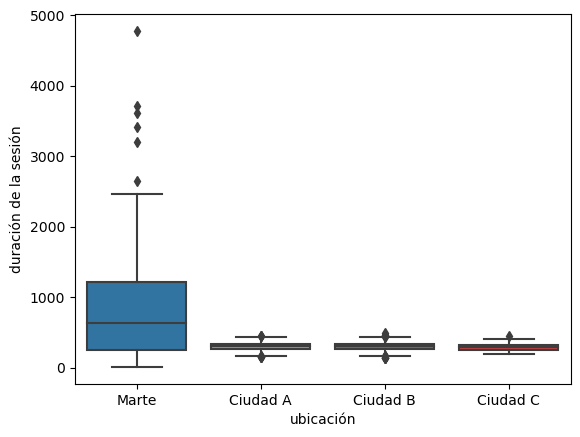

In [10]:
sns.boxplot(x='ubicación', y='duración de la sesión', data=conv)

In [11]:
from scipy.stats import ttest_ind

In [12]:
data_marte = conv[conv['ubicación'] == 'Marte']['duración de la sesión']
data_no_marte = conv[conv['ubicación'] != 'Marte']['duración de la sesión']

t_stat, p_value = ttest_ind(data_marte, data_no_marte)

In [13]:
if p_value < 0.05:
  print("Rechazar la hipótesis nula. Hay diferencia significativa de duración de la sesión entre gente de marte y los que no.")
else:
  print("No rechazar la hipótesis nula.")

Rechazar la hipótesis nula. Hay diferencia significativa de duración de la sesión entre gente de marte y los que no.


In [14]:
conv = conv[conv['ubicación'] != 'Marte']

In [15]:
conv.shape

(2850, 8)

In [16]:
def plot_outliers(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).shape[1]
    num_rows = (num_cols - 1) // 2 + 1
    fig, axs = plt.subplots(num_rows, 2, figsize=(20, 5*num_rows))
    axs = axs.flatten()
    for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
        box = axs[i].boxplot(df[col], patch_artist=True, boxprops=dict(facecolor='#336fa2'), medianprops=dict(color='black'))
        for patch in box['fliers']:
            patch.set_markerfacecolor('black')
            patch.set_markeredgecolor('black')
        axs[i].set_title(col)
    plt.tight_layout()
    plt.show()

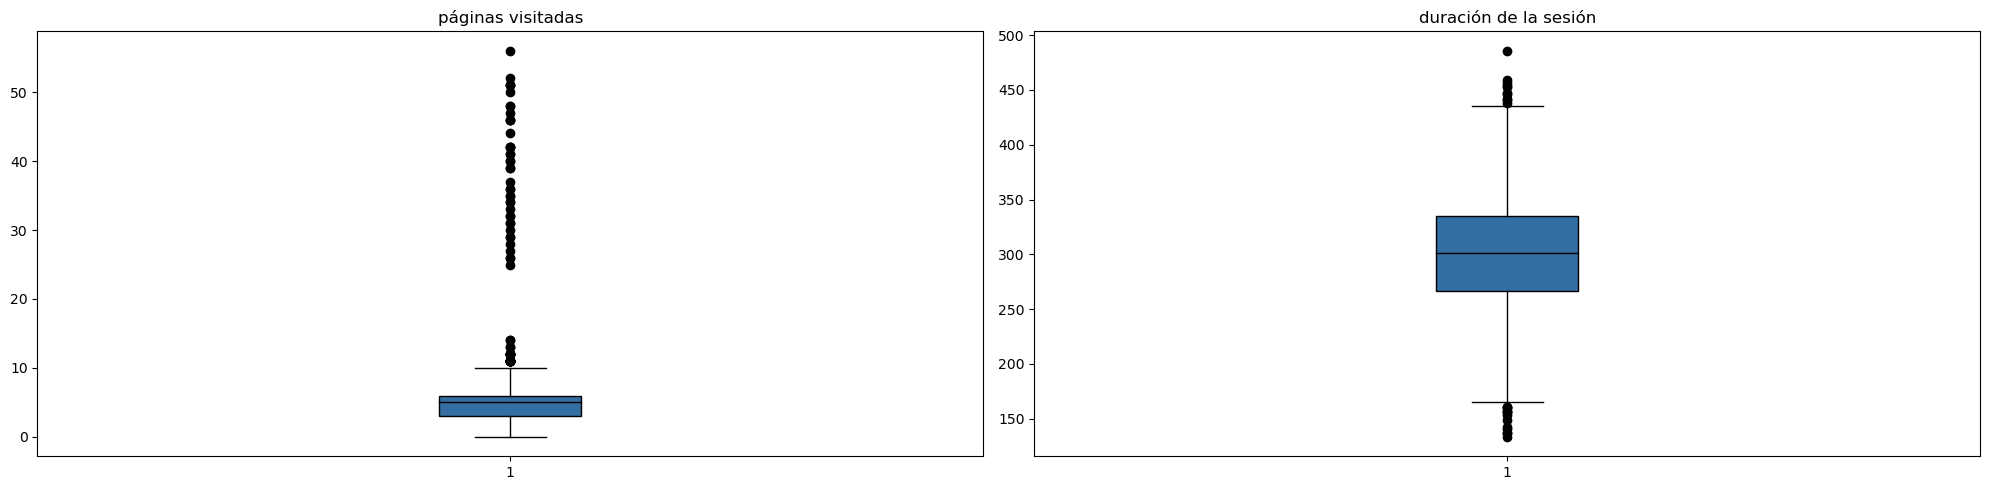

In [17]:
plot_outliers(conv[['páginas visitadas', 'duración de la sesión']])

In [18]:
def find_and_filter_outliers(dataframe, column_name):
    # Calcular el rango intercuartílico
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # marcar las rows como outliers
    dataframe['is_outlier'] = dataframe[column_name].apply(lambda x: 'Yes' if (x < lower_bound or x > upper_bound) else 'No')
   

    # Retornar un dataset filtrado
    return dataframe[dataframe['is_outlier'] == 'No']

In [19]:
conv.shape[0] - find_and_filter_outliers(conv, 'páginas visitadas').shape[0]

74

In [20]:
conv.shape[0] - find_and_filter_outliers(conv, 'duración de la sesión').shape[0]

23

In [21]:
#Filtaria la columna paginas visitadas, porque en mi opinion no tiene sentido que se abran tantas veces, y 
#la duracion de la sesion puede ser un poco mas larga o corta de lo normal.

In [22]:
conv = find_and_filter_outliers(conv, 'páginas visitadas')

In [23]:
conv.columns

Index(['id del cliente', 'páginas visitadas', 'duración de la sesión',
       'número de visitas', 'fecha de nacimiento', 'ubicación', 'dispositivo',
       'convertido', 'is_outlier'],
      dtype='object')

In [24]:
x = conv[['páginas visitadas', 'duración de la sesión','número de visitas', 'ubicación', 'dispositivo']]

In [25]:
df_con_dummies = pd.get_dummies(x, columns=['ubicación', 'dispositivo'])

In [26]:
#Sacaria el id y la fecha de nacimiento, porque no te interesa para predecir la hora en la que nacieron

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [28]:
def convertir_num(x):
    if x == 'Sí':
        return True
    else:
        return False

In [29]:
X = df_con_dummies
y = conv['convertido'].apply(convertir_num)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
decision_tree_model = DecisionTreeClassifier(criterion="entropy", random_state=2,
max_depth=3)
# Validación cruzada
decision_tree_model.fit(X_train, y_train)
# Matriz de confusión
y_pred = decision_tree_model.predict(X_test)
y_true = y_test

In [32]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

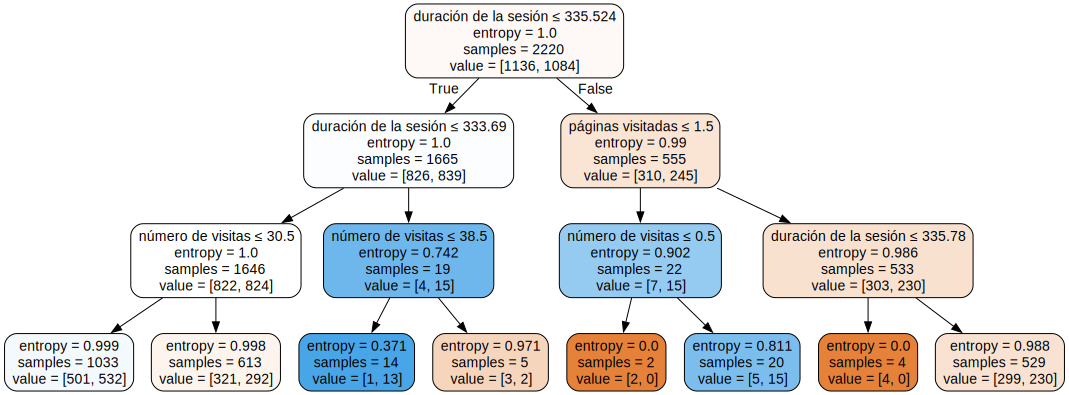

In [33]:
features = X.columns
targets =y
data = export_graphviz(decision_tree_model, out_file = None, feature_names = features, filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(data)
graph

In [34]:
#Las reglas que haria serian:
#1) si la sesion duro mas de x minutos
#2) si se visito mas de x cantidad de paginas

In [35]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

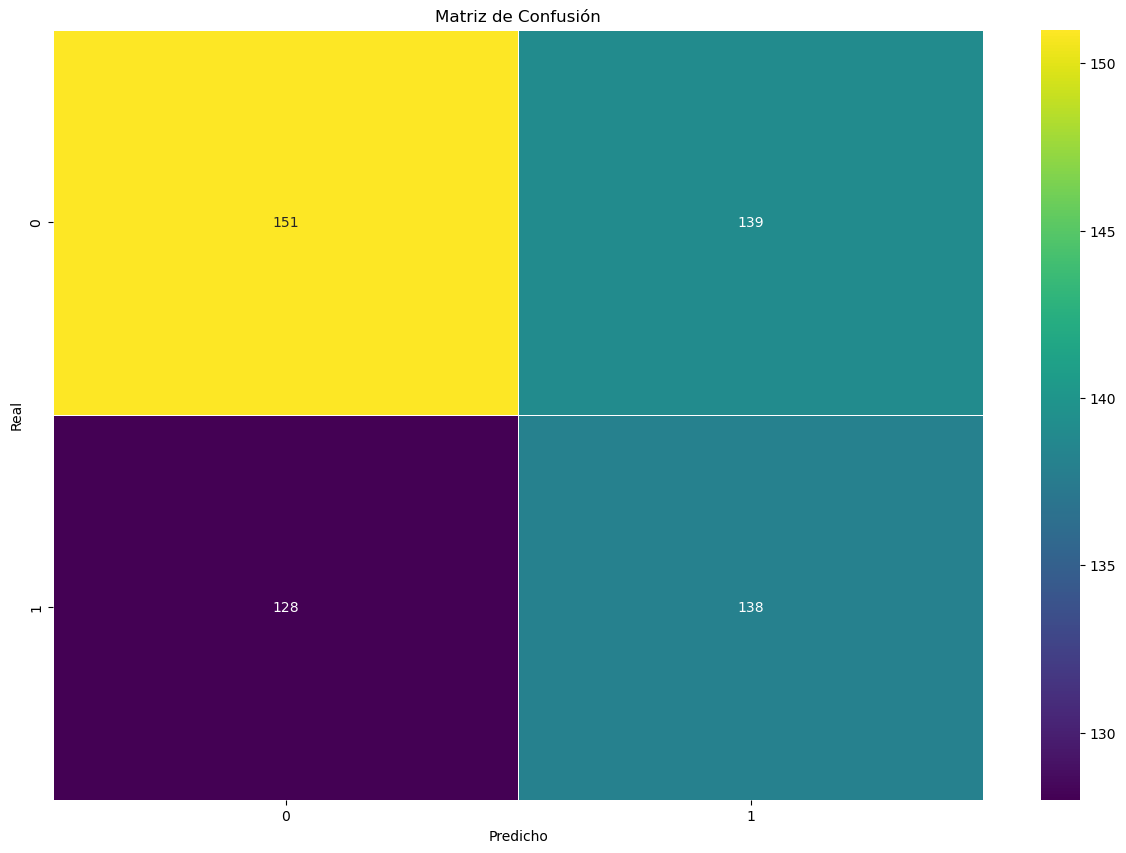

In [36]:
cm_dt = confusion_matrix(y_true, y_pred)
# Visualización de la matriz de confusión
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title('Matriz de Confusión')
plt.show()

In [37]:
precision_score(y_true, y_pred)

0.4981949458483754

In [38]:
recall_score(y_true, y_pred)

0.518796992481203

In [39]:
accuracy_score(y_true, y_pred)

0.5197841726618705

In [40]:
#El precision score es la posibilidad de que no clasifique como positivo una muestra negativa

In [41]:
ing = pd.read_csv('ingreso_para_entrenar.csv')

In [42]:
ing

,Unnamed: 0,gasto_alimentacion,gasto_tecnologia,gasto_moda,frecuencia_compra,promociones_utilizadas,distancia_a_hipermercados,ingreso_cliente
0,0,437.086107,318.442747,246.279263,7.0,6,56.235016,319.511016
1,1,955.642876,835.756374,235.234099,3.0,8,52.603747,430.490885
2,2,758.794548,1315.771462,729.690935,5.0,1,82.980012,643.483521
3,3,638.792636,1111.726085,237.159650,3.0,3,50.024691,322.259467
4,4,240.416776,1219.513664,253.962295,NaN,3,38.493164,366.779166
...,...,...,...,...,...,...,...,...
995,995,182.423866,1002.584977,698.971819,3.0,0,89.929168,532.971139
996,996,925.582218,1437.091201,167.954906,4.0,6,64.596994,589.117449
997,997,223.136768,149.989124,282.340894,6.0,4,43.710203,178.161379
998,998,955.213618,132.729346,267.534149,4.0,3,38.721009,420.855709


In [43]:
ing.isna().sum()

Unnamed: 0                    0
gasto_alimentacion            0
gasto_tecnologia              0
gasto_moda                   50
frecuencia_compra            80
promociones_utilizadas        0
distancia_a_hipermercados     0
ingreso_cliente               0
dtype: int64

In [44]:
ing[ing['gasto_moda'].isna()].head()

,Unnamed: 0,gasto_alimentacion,gasto_tecnologia,gasto_moda,frecuencia_compra,promociones_utilizadas,distancia_a_hipermercados,ingreso_cliente
10,10,118.526045,370.753691,NaN,NaN,9,46.286705,-82.995895
12,12,849.198377,1418.886043,NaN,6.0,1,70.624531,941.373707
37,37,187.904903,1100.911819,NaN,0.0,5,26.937772,109.212050
45,45,696.270056,943.001623,NaN,4.0,0,93.696170,617.921474
55,55,929.686812,558.532132,NaN,1.0,5,48.992796,301.020862


In [45]:
ing[ing['frecuencia_compra'].isna()].head()

,Unnamed: 0,gasto_alimentacion,gasto_tecnologia,gasto_moda,frecuencia_compra,promociones_utilizadas,distancia_a_hipermercados,ingreso_cliente
4,4,240.416776,1219.513664,253.962295,NaN,3,38.493164,366.779166
10,10,118.526045,370.753691,NaN,NaN,9,46.286705,-82.995895
21,21,225.544475,481.156061,470.126138,NaN,0,40.322479,241.394123
22,22,362.930184,1390.374483,752.616847,NaN,2,106.470497,702.183467
28,28,633.173112,512.695686,242.397547,NaN,0,58.885328,525.972505


In [46]:
ing['gasto_moda'] = ing['gasto_moda'].fillna(0)

In [47]:
ing['frecuencia_compra'] = ing['frecuencia_compra'].fillna(method='bfill', axis=0).fillna(0)

In [48]:
#gasto moda cambie por 0 porque no necesariamente tendria que tener gastos en moda

In [49]:
ing = ing.drop(columns = 'Unnamed: 0')

In [50]:
ing.columns

Index(['gasto_alimentacion', 'gasto_tecnologia', 'gasto_moda',
       'frecuencia_compra', 'promociones_utilizadas',
       'distancia_a_hipermercados', 'ingreso_cliente'],
      dtype='object')

In [51]:
#En mi opinion habria que usar todas las variables, porque todas pueden aportar al modelo a simple vista.

In [52]:
X = ing[['gasto_alimentacion', 'gasto_tecnologia', 'gasto_moda',
       'frecuencia_compra', 'promociones_utilizadas',
       'distancia_a_hipermercados']]
y = ing['ingreso_cliente']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [54]:
import statsmodels.api as sm
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()

In [55]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:        ingreso_cliente   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     413.6
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          5.29e-266
Time:                        11:14:56   Log-Likelihood:                -6097.3
No. Observations:                1000   AIC:                         1.221e+04
Df Residuals:                     993   BIC:                         1.224e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [56]:
#El coef es cuanto cambiaria la variable dependiente en caso de que cambie en una unidad la variable independiente. 

In [57]:
import numpy as np
predicciones = modelo.predict(X)
# Calcular MAPE
mape = np.mean(np.abs((y - predicciones) / y)) * 100
print(f"MAPE: {mape}%")

MAPE: 36.03650082709766%


In [58]:
#El error mape es la media del error en valor absoluto del valor (actual - predicho) / actual